In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import sklearn.linear_model
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header = None)
df2.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df2 = df2.sort_values('age')
df2 = df2.reset_index(drop=True)
df2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0
1,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0,0
2,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0
3,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
4,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
5,35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,2.0,0.0,7.0,1
6,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1
7,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
8,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
9,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df2[df2.thal == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
106,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
119,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0


In [8]:
df2[df2.ca == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
9,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0
41,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
109,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
181,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0


In [9]:
ca_Nan_index= df2.index[df2.ca == '?'].tolist()
thal_Nan_index = df2.index[df2.thal == '?'].tolist()

#concatenate list
drop_Nan_index = thal_Nan_index + ca_Nan_index

print('List of indexs containg Nans',drop_Nan_index)

List of indexs containg Nans [106, 119, 9, 41, 109, 181]


In [10]:
df = df.drop(df.index[drop_Nan_index])
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1


In [11]:
df=df.astype({"age":'float', "sex":'float',"cp":'float',"trestbps":'float',"thalach":'float', "chol":'float',"fbs":'float',"restecg":'float',
                "exang":'float',"oldpeak":'float',"slope":'float',"ca":'float',"thal":'float'})

In [12]:
df.info()
print("------------------")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.966330,131.461279,246.629630,0.148148,0.535354,149.606061,0.329966,1.050842,1.400673,0.730640,2.316498,0.538721
std,9.087846,0.464550,1.029404,17.523325,52.132279,0.355846,0.525944,22.899377,0.470994,1.166860,0.618739,1.020816,0.615809,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Number of people without disease:  137
Number of people with disease: 160 



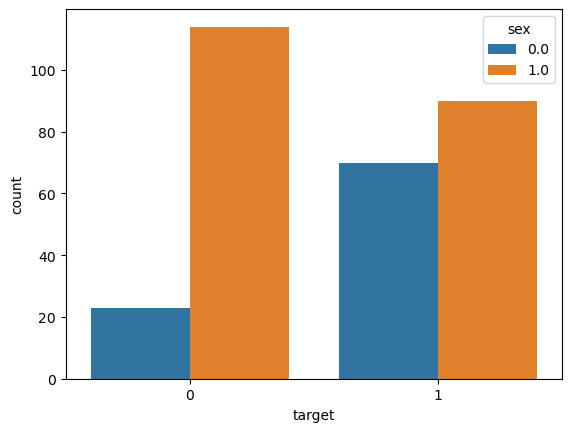

In [14]:
no_disease = sum(df.target == 0)
disease= sum(df.target == 1)
print('Number of people without disease: ',no_disease)
print('Number of people with disease:', disease,'\n')
sns.countplot(df, hue="sex",x="target")
plt.show()

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.104580,-0.082566,0.269972,0.220985,0.109885,-0.117003,-0.392790,0.107345,0.211229,-0.168268,0.267639,0.064201,-0.224737
sex,-0.104580,1.000000,-0.071574,-0.063124,-0.198987,0.036332,-0.072069,-0.053873,0.149570,0.091170,-0.032174,0.127874,0.217700,-0.289808
cp,-0.082566,-0.071574,1.000000,0.034950,-0.072566,0.078222,0.039646,0.300975,-0.395087,-0.153824,0.122031,-0.182267,-0.159002,0.436325
trestbps,0.269972,-0.063124,0.034950,1.000000,0.133854,0.169961,-0.113761,-0.039520,0.072777,0.196391,-0.116501,0.094601,0.062189,-0.149344
chol,0.220985,-0.198987,-0.072566,0.133854,1.000000,0.012802,-0.150705,-0.007546,0.063332,0.056336,-0.001249,0.071441,0.098269,-0.082636
fbs,0.109885,0.036332,0.078222,0.169961,0.012802,1.000000,-0.082233,-0.000276,0.029863,0.009462,-0.055693,0.138127,-0.029692,-0.032392
restecg,-0.117003,-0.072069,0.039646,-0.113761,-0.150705,-0.082233,1.000000,0.040011,-0.074527,-0.072576,0.086093,-0.070298,-0.013803,0.145921
thalach,-0.392790,-0.053873,0.300975,-0.039520,-0.007546,-0.000276,0.040011,1.000000,-0.385088,-0.348852,0.386242,-0.198505,-0.088395,0.417780
exang,0.107345,0.149570,-0.395087,0.072777,0.063332,0.029863,-0.074527,-0.385088,1.000000,0.291483,-0.258124,0.122244,0.209466,-0.442355
oldpeak,0.211229,0.091170,-0.153824,0.196391,0.056336,0.009462,-0.072576,-0.348852,0.291483,1.000000,-0.587957,0.222552,0.207438,-0.428108


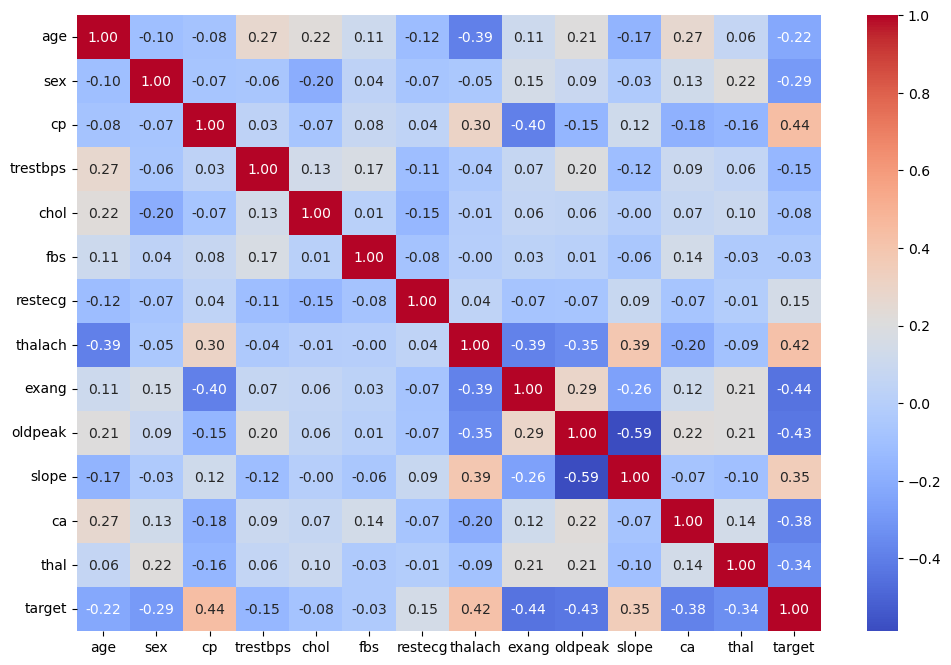

In [16]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

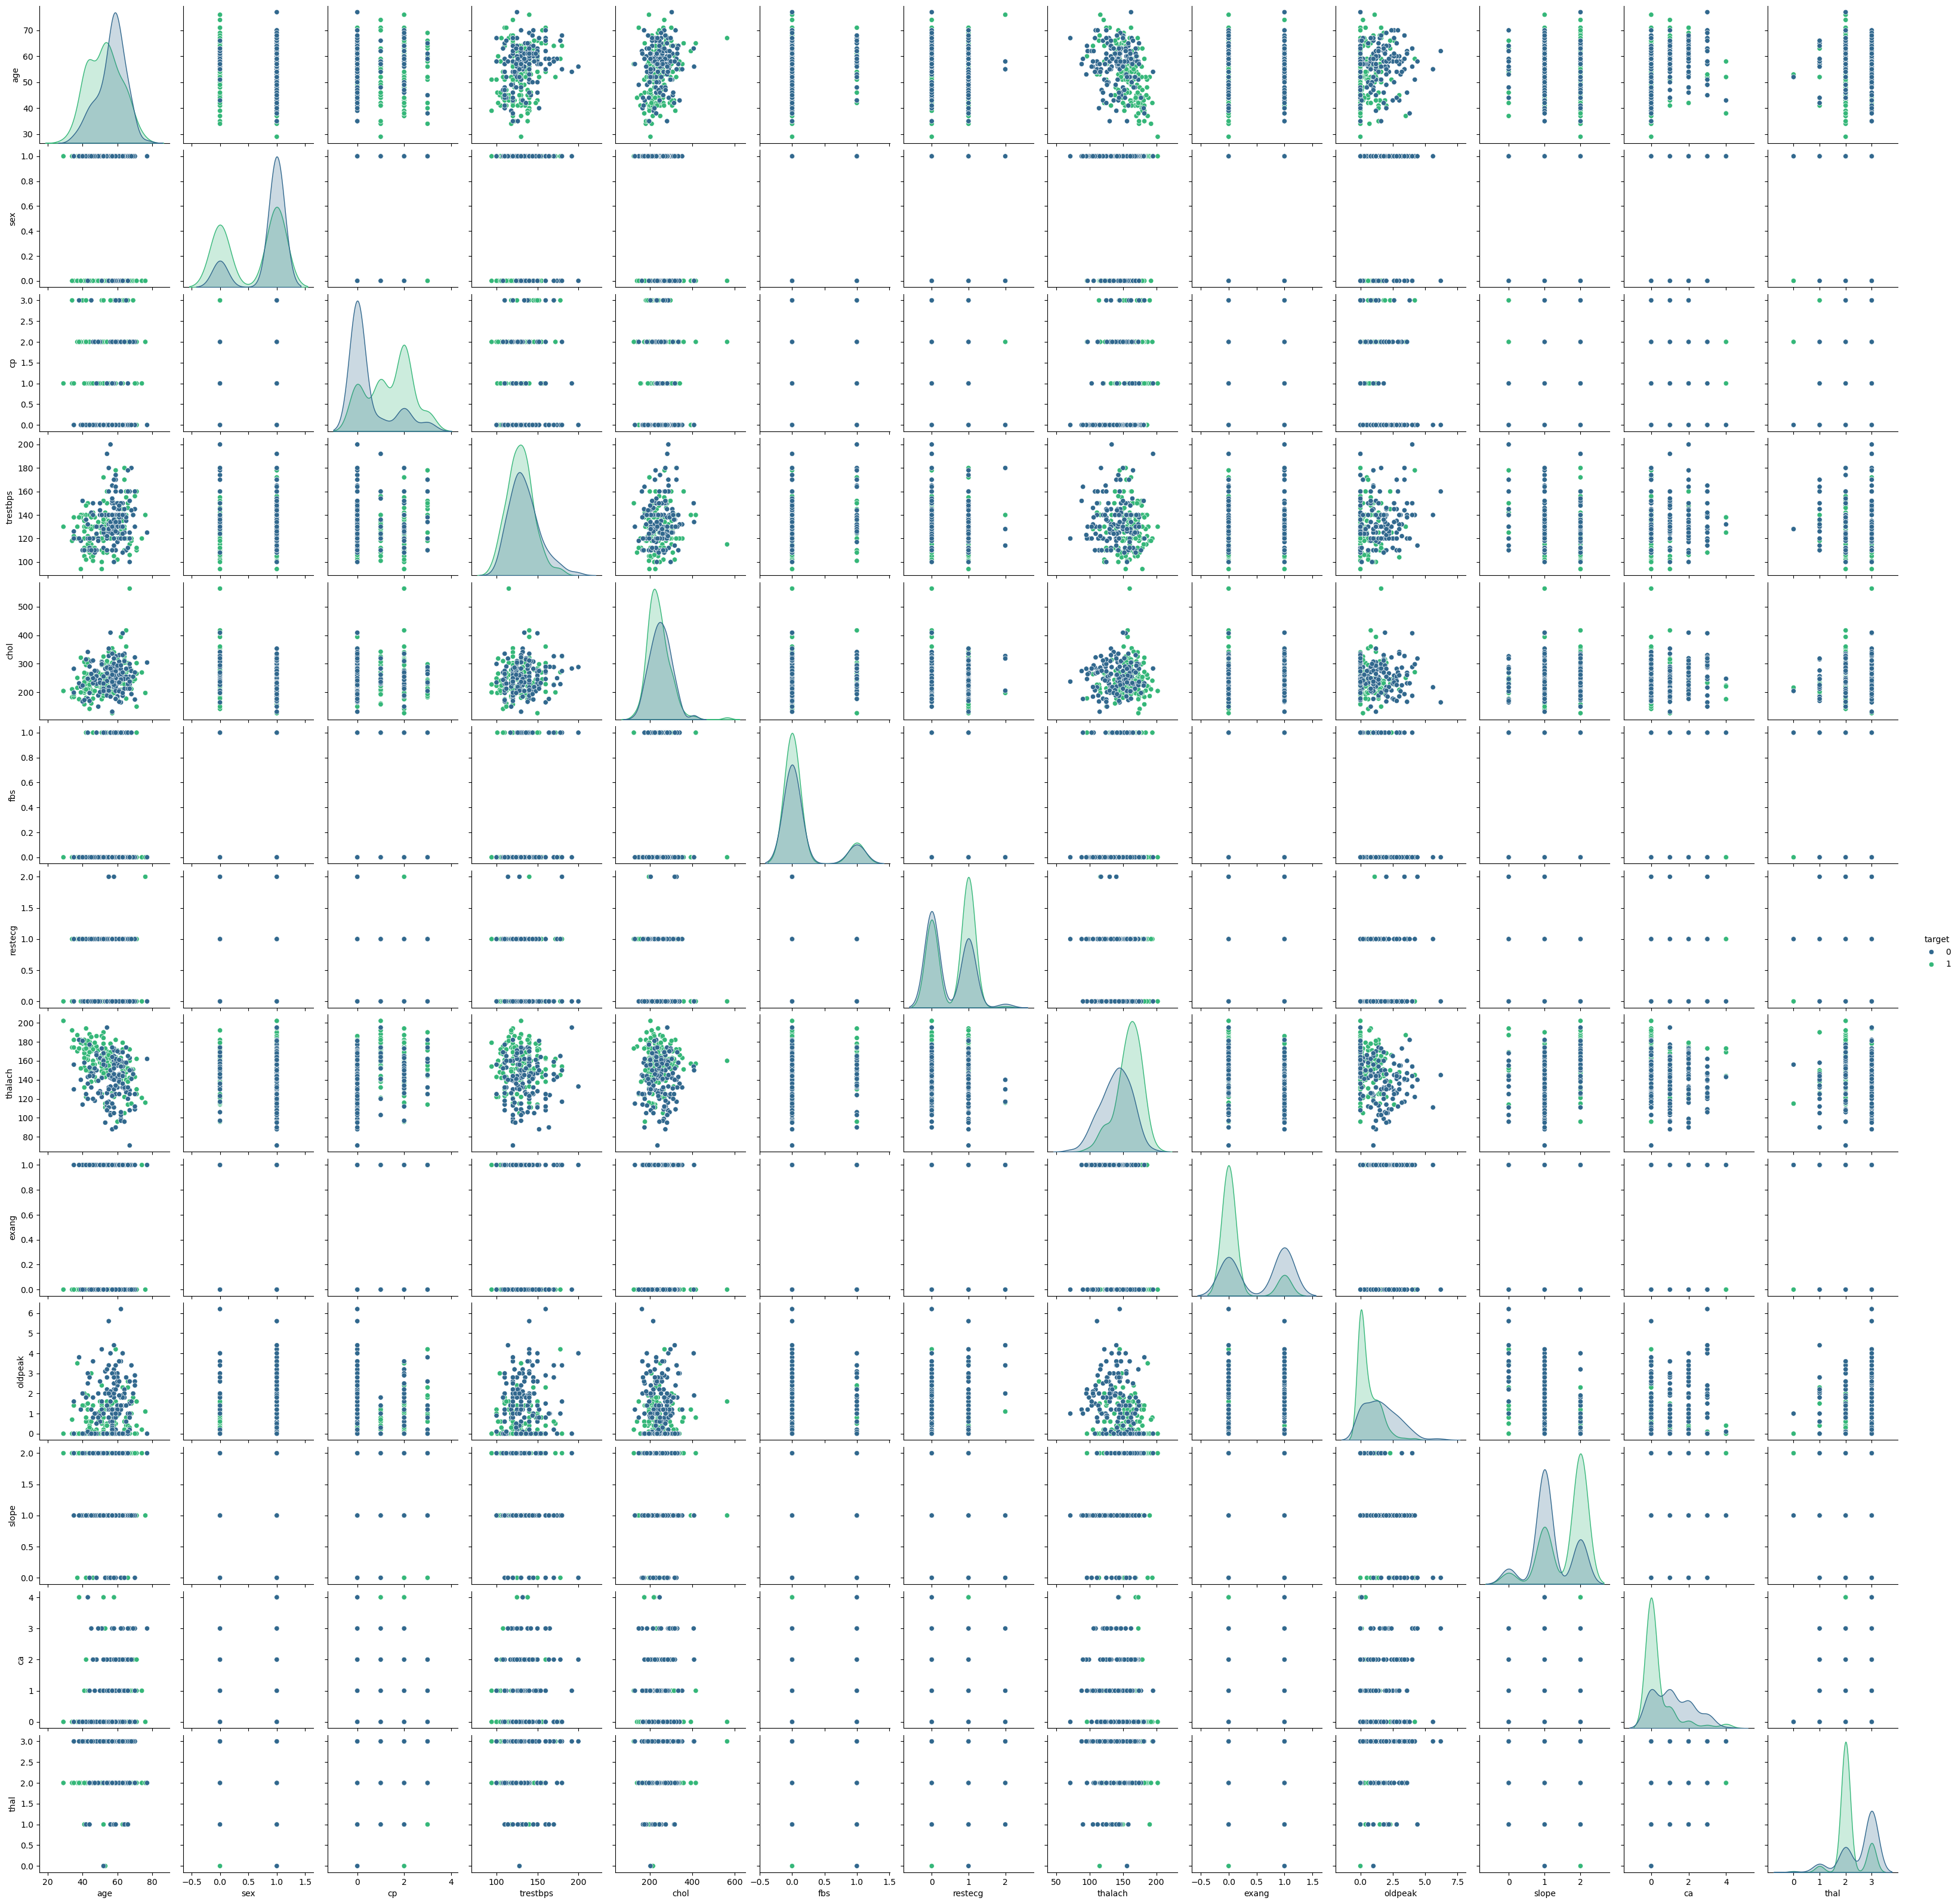

In [17]:
# selected_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "target"]
sns.pairplot(df, hue="target", palette="viridis", diag_kind="kde")
plt.show()

In [18]:
x = df.age
y = df.thalach
est=smf.ols('y ~ x', df).fit()

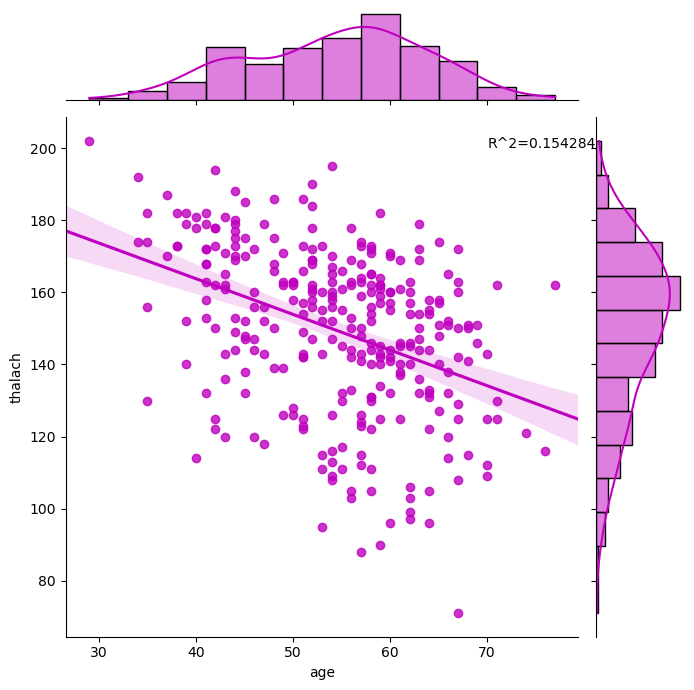

In [19]:
# PLOTTING R^2
g = sns.jointplot(x="age", y="thalach", data=df, kind="reg", truncate=False, color="m", height=7)
plt.text(70,200, 'R^2=' + str(round(est.rsquared,6)));

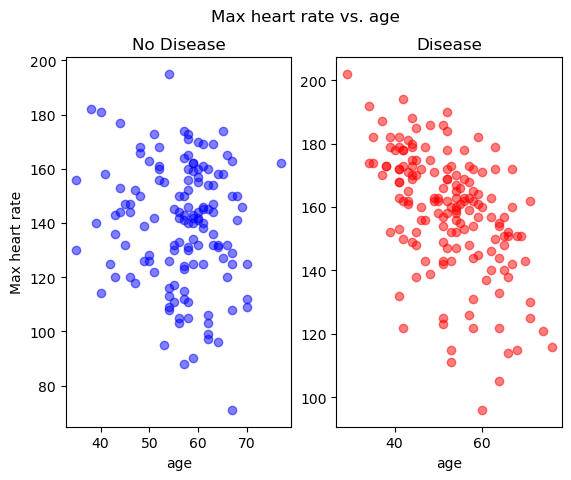

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2);
fig.suptitle('Max heart rate vs. age');
ax1.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="blue",alpha = 0.5);
ax2.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red",alpha = 0.5);

ax1.set_title('No Disease');
ax2.set_title('Disease');

ax1.set_xlabel('age');
ax2.set_xlabel('age');
ax1.set_ylabel('Max heart rate');

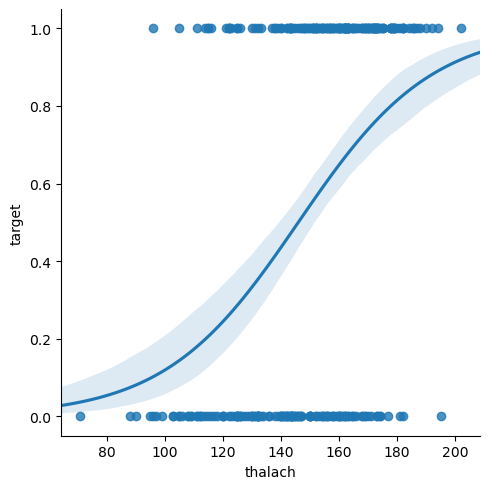

In [21]:
g = sns.lmplot(x="thalach", y="target",data=df, logistic=True, truncate=False)

In [22]:
X_train, X_test, y_train, y_test = df.thalach[0::2], df.thalach[1::2],df.target[0::2], df.target[1::2]
X_train, X_test = np.array(X_train).reshape(-1, 1), np.array(X_test).reshape(-1, 1)

print('xtest shape: ',X_test.shape,'ytrain shape: ',y_test.shape)
print('ytest shape: ',X_train.shape,'ytest shape: ',y_train.shape)

xtest shape:  (148, 1) ytrain shape:  (148,)
ytest shape:  (149, 1) ytest shape:  (149,)


In [23]:
#Single Factor Logistic Regression
def logistic(model, x):
    z = np.exp(model.intercept_ + model.coef_ * x)
    return  z / (1 + z)

In [24]:
lr = sklearn.linear_model.LogisticRegressionCV()
default_mod = lr.fit(X_train,y_train)
print('Intercept (b0) is', default_mod.intercept_,'\n')
print('Logistic coefficient (b1) is', default_mod.coef_)

Intercept (b0) is [-5.88792501] 

Logistic coefficient (b1) is [[0.04077008]]


In [25]:
yhat = default_mod.predict(X_train)
yhat_p = default_mod.predict_proba(X_train)

print('For a thalach reading of',' '.join (map(str, X_train[0])), 'we get a probability',
      
' '.join (map(str,logistic(default_mod, X_train[0]))), 'yhat is', yhat[0])

For a thalach reading of 150.0 we get a probability [0.55665244] yhat is 1


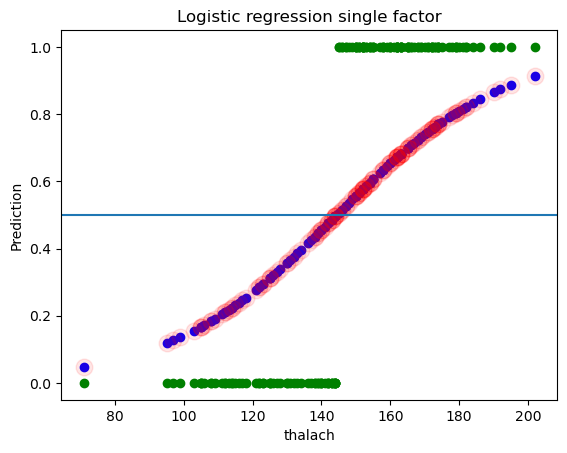

In [26]:
plt.plot(X_train,yhat,'go');
plt.plot(X_train,yhat_p[:,1],'bo');
plt.plot(X_train, logistic(default_mod, X_train), 'ro', alpha = 0.1,markersize = 12)
plt.axhline(0.5);
plt.title('Logistic regression single factor');
plt.xlabel('thalach')
plt.ylabel('Prediction');

In [27]:
y_pred = default_mod.predict(X_test)

lg_single_train_score = round(default_mod.score(X_train, y_train),3)
lg_single_test_score = round(default_mod.score(X_test, y_test),3)

print('Training Score: ',lg_single_train_score)
print('Testing Score: ',lg_single_test_score)

print('Using Thalach as the only factor for the prediction model we get a testing score of: ',round(default_mod.score(X_test, y_test),3),
     'and a training score: ',round(default_mod.score(X_train, y_train),3))

Training Score:  0.685
Testing Score:  0.703
Using Thalach as the only factor for the prediction model we get a testing score of:  0.703 and a training score:  0.685


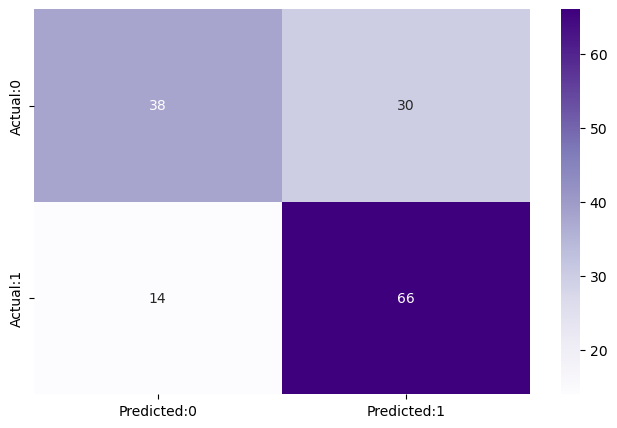

Classification Report: =
              precision    recall  f1-score   support

           0       0.73      0.56      0.63        68
           1       0.69      0.82      0.75        80

    accuracy                           0.70       148
   macro avg       0.71      0.69      0.69       148
weighted avg       0.71      0.70      0.70       148



In [28]:
y_pred = default_mod.predict(X_test)

  
cm = confusion_matrix(y_test, y_pred)
conf_matrix_lg_single = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_lg_single, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

default_mod_cr = classification_report(y_test, y_pred)
print('Classification Report: =')
print (default_mod_cr)

In [29]:
vdf=pd.DataFrame()
vdf['factors']=df.columns
vdf['VarianceInfluenceFactor']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vdf.sort_values(by='VarianceInfluenceFactor', ascending = False)

,factors,VarianceInfluenceFactor
3,trestbps,58.396450
7,thalach,47.393303
0,age,38.656464
4,chol,26.214371
12,thal,17.558710
10,slope,10.317148
13,target,4.346306
1,sex,3.734504
9,oldpeak,3.185860
2,cp,2.603799


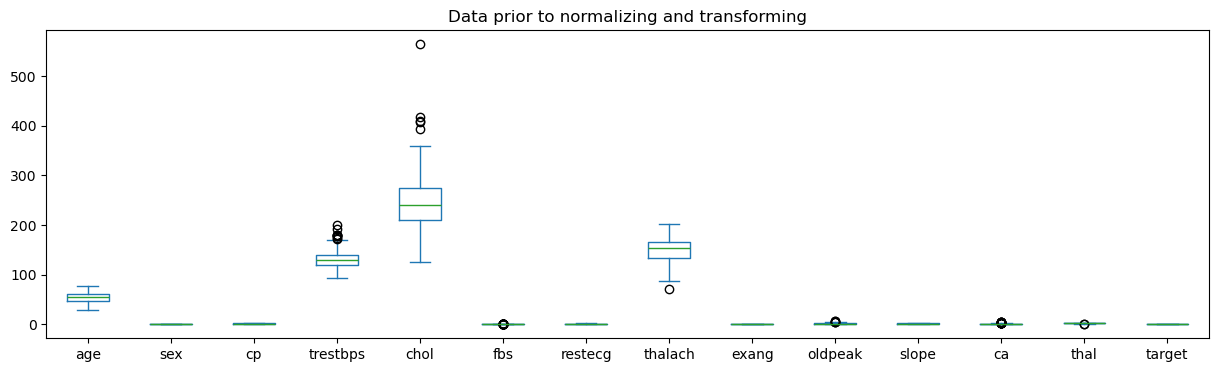

In [30]:
df.plot.box(figsize=(15,4));
plt.title('Data prior to normalizing and transforming');

In [31]:
X = np.asarray(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
y = np.asarray(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 13) (207,)
Test set: (90, 13) (90,)


In [32]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

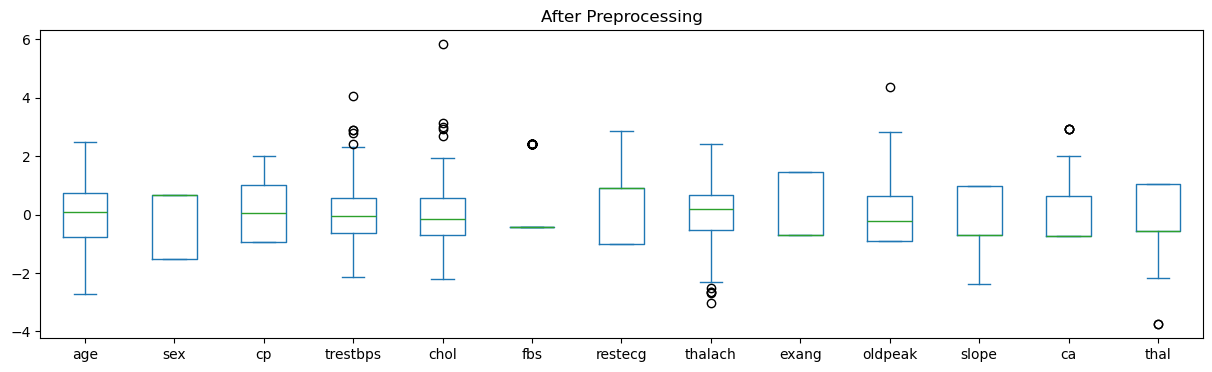

In [33]:
labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

dfp = pd.DataFrame(X_train,columns = labels)
dfp.plot.box(figsize=(15,4));
plt.title('After Preprocessing');

In [34]:
vdf=pd.DataFrame()
vdf['factors']=dfp.columns 
vdf['VarianceInfluenceFactor']=[variance_inflation_factor(dfp.values,i) for i in range(len(dfp.columns))]
vdf.sort_values(by='VarianceInfluenceFactor', ascending=False)

,factors,VarianceInfluenceFactor
9,oldpeak,1.768743
10,slope,1.708820
7,thalach,1.648736
0,age,1.480853
8,exang,1.415951
2,cp,1.310720
11,ca,1.247124
12,thal,1.180523
4,chol,1.179472
3,trestbps,1.170524


In [35]:
#Multiclass Logistic Regression
logreg = sklearn.linear_model.LogisticRegression(C=1e20)

X = logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

train_all_lg = round(logreg.score(X_train, y_train),3)
test_all_lg = round(logreg.score(X_test, y_test),3)

print('Below we see the score is better using all 13 factors coming back at', round(logreg.score(X_test, y_test),3),'\n')
print('Training Score: ',train_all_lg)
print('Testing Score: ', test_all_lg)

Below we see the score is better using all 13 factors coming back at 0.767 

Training Score:  0.874
Testing Score:  0.767


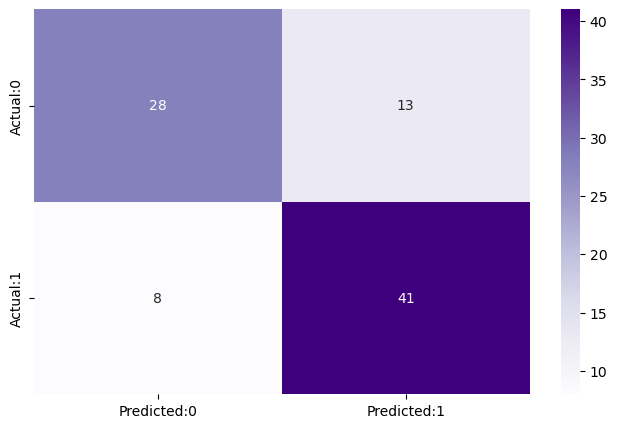

Classification Report: =
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        41
           1       0.76      0.84      0.80        49

    accuracy                           0.77        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.77      0.76        90



In [36]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix_lg = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_lg, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

conf_matrix_lg_cr = classification_report(y_test, y_pred)
print('Classification Report: =')
print(conf_matrix_lg_cr)

In [37]:
accuracy  = (cm[0,0] + cm[1,1])/ np.sum(cm)

precision_0 = round(cm[0,0]/np.sum(cm[:,0]),2)
precision_1 = round(cm[1,1]/np.sum(cm[:,1]),2)

recall_0 = round(cm[0,0]/np.sum(cm[0,:]),2)
recall_1 = round(cm[1,1]/np.sum(cm[1,:]),2)

f1_score_0 = round(2/((1/precision_0)+(1/recall_0)),3)
f1_score_1 = round(2/((1/precision_1)+(1/recall_1)),3)

results = pd.DataFrame([[precision_0,precision_1],[recall_0,recall_1],[f1_score_0,f1_score_1]]).T
results.columns = ['precision','recall','f1-score']
print('Basic classification report: \n')
print('Model accuracy',accuracy,'\n')
results

Basic classification report: 

Model accuracy 0.7666666666666667 



,precision,recall,f1-score
0,0.78,0.68,0.727
1,0.76,0.84,0.798


In [38]:
#Linear Discriminant Analysis
ld = LinearDiscriminantAnalysis()
ld_model = ld.fit(X_train,y_train)

In [39]:
y_pred = ld.predict(X_test)

conf_matrix_LDA = confusion_matrix(y_test, y_pred)
print('LDA Confusion Matrix:\n', conf_matrix_LDA,'\n')

conf_matrix_LDA_cr = classification_report(y_test, y_pred)
print(conf_matrix_LDA_cr)

#scores
LDA_score_train = round(ld.score(X_train, y_train),3)
LDA_score_test = round(ld.score(X_test, y_test),3)
print('Training Score: ',LDA_score_train)
print('Testing Score: ',LDA_score_test)

LDA Confusion Matrix:
 [[27 14]
 [ 9 40]] 

              precision    recall  f1-score   support

           0       0.75      0.66      0.70        41
           1       0.74      0.82      0.78        49

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.74      0.74      0.74        90

Training Score:  0.85
Testing Score:  0.744


In [40]:
#K-Nearest Neighbors
recalls = []
ks = list(range(1,30))
for k in ks:
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k)
    neigh.fit(X_train, y_train)
    knn_hat = neigh.predict(X_test)
    knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
    recalls.append( sklearn.metrics.recall_score(y_test, knn_hat, average='micro') )
kdat =pd.DataFrame(recalls, ks)

Smallest k with highest score, 13 and score for k    0.8
Name: 13, dtype: float64


C:\Users\shukl\AppData\Local\Temp\ipykernel_4036\1166974163.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(k,kdat.loc[k].ravel(),'ro',markersize = 12)


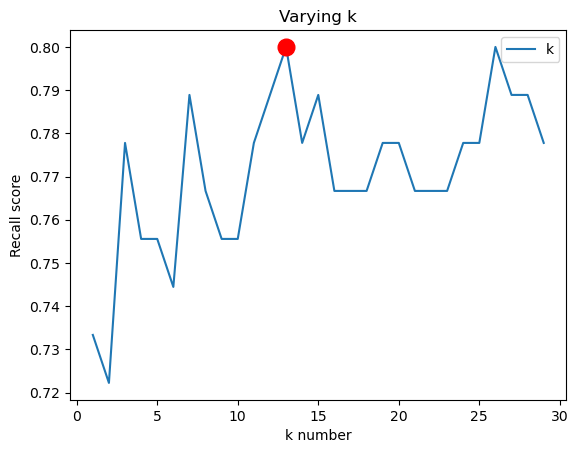

In [41]:
kdat.columns = ['k']
k = kdat['k'].idxmax()
print('Smallest k with highest score,', k,'and score for', kdat.loc[k])

kdat.plot();
plt.plot(k,kdat.loc[k].ravel(),'ro',markersize = 12)
plt.title('Varying k');
plt.xlabel('k number');
plt.ylabel('Recall score');

In [42]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=13)

In [43]:
knn_hat = neigh.predict(X_test)

In [44]:
knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
print('KNN(', k,') confusion matrix is = \n', '\n',knn_cm,'\n')
print('Success = ', knn_cm[1,1] / (knn_cm[1,0] + knn_cm[1,1]),'\n')
knn_cr = sklearn.metrics.classification_report(y_test, knn_hat)
print(knn_cr)

knn_score_train = round(neigh.score(X_train, y_train),3)
knn_score_test = round(neigh.score(X_test, y_test),3)
print('Training Score: ',knn_score_train)
print('Testing Score: ',knn_score_test)

KNN( 13 ) confusion matrix is = 
 
 [[29 12]
 [ 6 43]] 

Success =  0.8775510204081632 

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.78      0.88      0.83        49

    accuracy                           0.80        90
   macro avg       0.81      0.79      0.80        90
weighted avg       0.80      0.80      0.80        90

Training Score:  0.87
Testing Score:  0.8


In [45]:
#Random Forest Classifier
model=RandomForestClassifier(n_estimators = 1000, random_state=10,max_depth=7, n_jobs=-1)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, n_jobs=-1,
                       random_state=10)

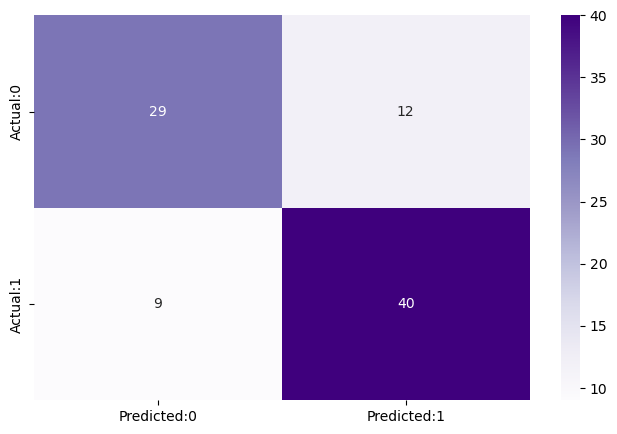

Classification Report: =
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.79        49

    accuracy                           0.77        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.77      0.77        90

Random Forest Test Score:  0.767
Random Forest Train Score:  0.995


In [46]:
y_pred=model.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples")
plt.show()

cr_rf= classification_report(y_test, y_pred)
print('Classification Report: =')
print(cr_rf)

rf_test_score = round(model.score(X_test,y_test),3)
rf_train_score = round(model.score(X_train,y_train),3)

print("Random Forest Test Score: ",rf_test_score)
print("Random Forest Train Score: ",rf_train_score)

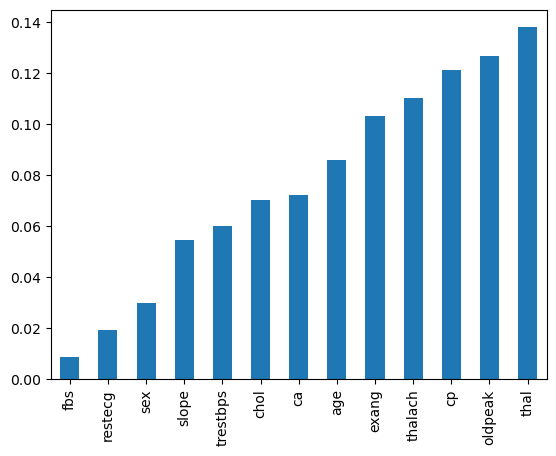

In [47]:
importances = model.feature_importances_
importances = pd.DataFrame(importances,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
importances=importances.rename(columns={0: "Features_Importance"})
importances  = importances.Features_Importance.sort_values()
importances.plot.bar();

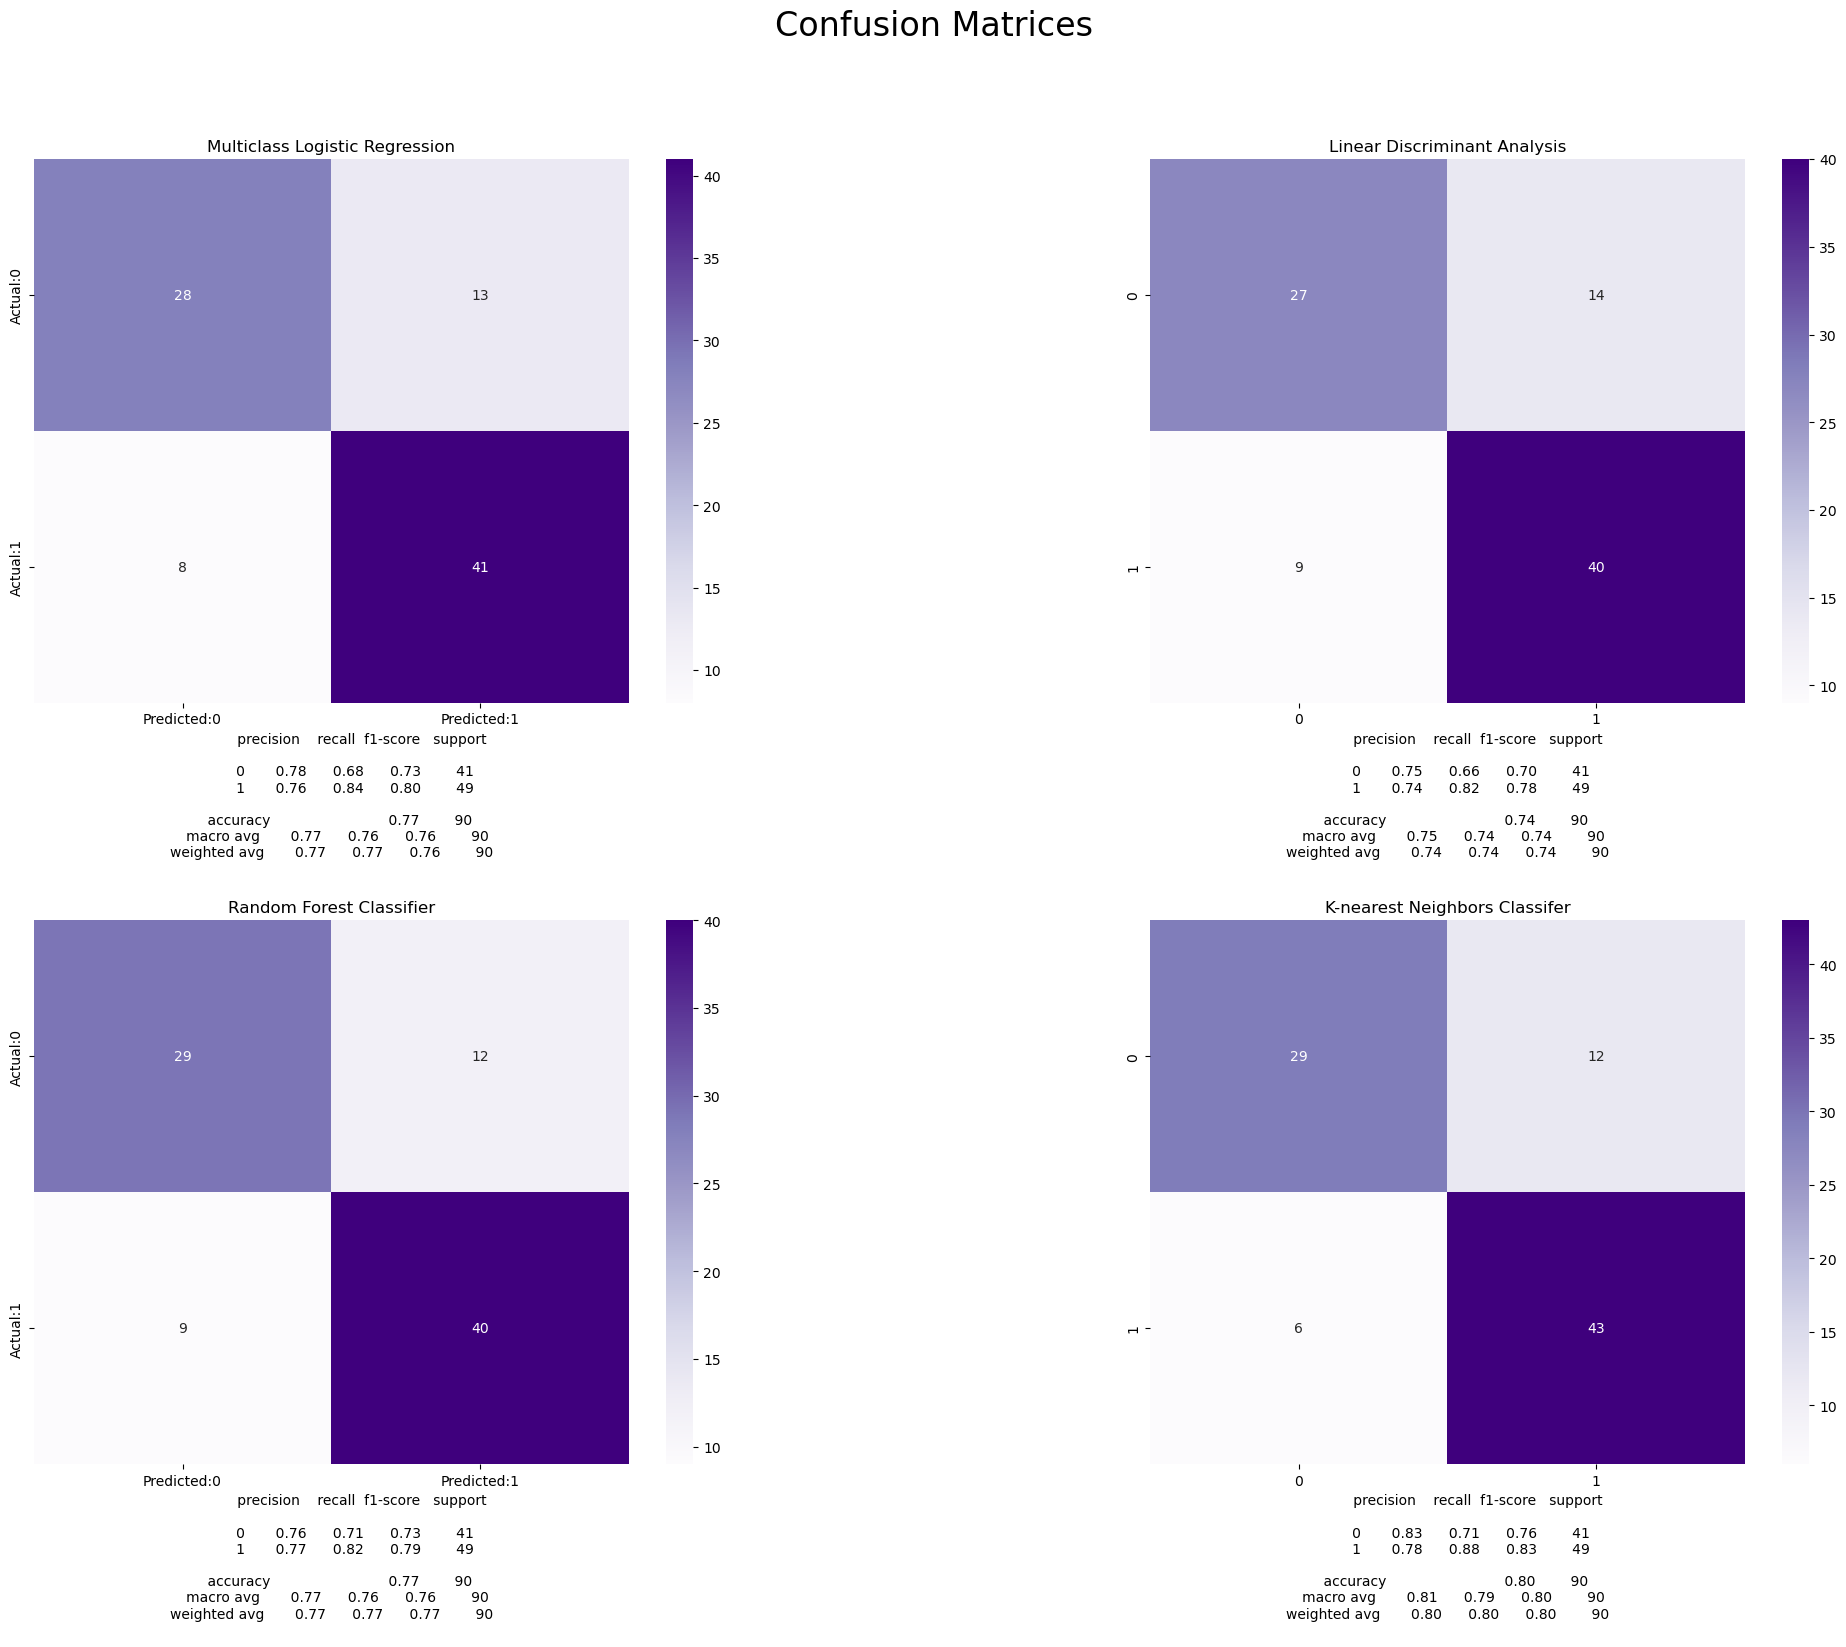

In [48]:
plt.figure(figsize=(24,15));
plt.suptitle("Confusion Matrices",fontsize=24);
plt.subplots_adjust(wspace = 0.5, hspace= 0.4,bottom=0.01)

plt.subplot(2,2,1);
plt.title("Multiclass Logistic Regression");
sns.heatmap(conf_matrix_lg, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(conf_matrix_lg_cr);

plt.subplot(2,2,2);
plt.title("Linear Discriminant Analysis");
sns.heatmap(conf_matrix_LDA, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(conf_matrix_LDA_cr);

plt.subplot(2,2,3);
plt.title("Random Forest Classifier");
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(cr_rf);

plt.subplot(2,2,4);
plt.title("K-nearest Neighbors Classifer");
sns.heatmap(knn_cm, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(knn_cr);

In [49]:
array = [[lg_single_train_score,lg_single_test_score],[train_all_lg, test_all_lg],[LDA_score_train,LDA_score_test],[knn_score_train, knn_score_test],[rf_train_score,rf_test_score ]]

label_index = ['Single Factor Logistic Regression','Multiclass Logistic Regression','Linear Discriminant Analysis','K-Nearest Neighbors','Random Forest Classifier']

results = pd.DataFrame(array, columns = ['Training Scores','Testing Scores'])

results = results.set_index([pd.Index(label_index)])

results.index.name = 'Model'

results

,Training Scores,Testing Scores
Model,,
Single Factor Logistic Regression,0.685,0.703
Multiclass Logistic Regression,0.874,0.767
Linear Discriminant Analysis,0.850,0.744
K-Nearest Neighbors,0.870,0.800
Random Forest Classifier,0.995,0.767


In [53]:
with open('./heart_disease_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
print("Model saved successfully at './heart_disease_model.pkl'")

Model saved successfully at './heart_disease_model.pkl'
